In [93]:
import os
import pandas as pd
import numpy as np
import math
import random
import collections
import timeit
import xgboost as xgb
import sklearn.metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [96]:

# Load training datasets
desc_train = pd.read_csv('Dataset/Description Data/train_desc_df.csv')
meta_train = pd.read_csv('Dataset/Metadata/train_meta_df.csv')
image_train = pd.read_csv('Dataset/Image Data/train_image_df.csv')
title_train = pd.read_csv('Dataset/Title Data/train_title_df.csv')

desc_test = pd.read_csv('Dataset/Description Data/public_desc_df.csv')
meta_test = pd.read_csv('Dataset/Metadata/public_meta_df.csv')
image_test = pd.read_csv('Dataset/Image Data/public_image_df.csv')
title_test = pd.read_csv('Dataset/Title Data/public_title_df.csv')
output = pd.read_csv('Dataset/solution_format.csv')


print('Dimension of train description data is', desc_train.shape)
print('Dimension of train meta data is', meta_train.shape)
print('Dimension of train image data is', image_train.shape)
print('Dimension of train title data is', title_train.shape)

print('Dimension of test description data is', desc_test.shape)
print('Dimension of test meta data is', meta_test.shape)
print('Dimension of test image data is', meta_test.shape)
print('Dimension of test title data is', title_test.shape)

Dimension of train description data is (3000, 51)
Dimension of train meta data is (3000, 14)
Dimension of train image data is (3000, 4001)
Dimension of train title data is (3000, 51)
Dimension of test description data is (986, 51)
Dimension of test meta data is (986, 13)
Dimension of test image data is (986, 13)
Dimension of test title data is (986, 51)


In [63]:
meta_train.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6


In [64]:
image_train.head()

,comp_id,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_3991,image_3992,image_3993,image_3994,image_3995,image_3996,image_3997,image_3998,image_3999,image_4000
0,1,0.484456,0.036087,-0.149328,0.144475,-0.617386,0.035018,0.169174,-0.005733,-0.104908,...,-0.090408,-0.032915,-0.010857,-0.015954,0.123416,0.195833,-0.066449,0.115818,-0.005140,0.017278
1,2,0.074533,-0.015655,-0.016286,-0.480964,0.687917,0.037131,-0.149725,-0.002098,0.099383,...,-0.625816,-0.009616,0.004558,0.008310,-0.173496,0.133518,-0.488898,0.084832,0.146566,0.007997
2,3,-0.396809,0.021490,-1.723037,0.666147,-0.631924,0.047724,0.336041,-0.003904,0.039683,...,-0.078059,0.086320,-0.005606,0.002414,-0.164493,0.218473,0.151292,-0.076860,0.008321,0.012555
3,4,0.995316,0.012766,0.387472,-0.684791,-0.209261,0.013654,0.138517,0.005586,0.079277,...,-0.190714,-0.005452,-0.003889,0.013430,0.344406,0.038220,0.210446,-0.145128,-0.019172,0.000532
4,5,-0.611648,0.000860,-0.572393,0.894287,-0.191228,-0.111583,-0.011111,0.003231,-0.160582,...,-0.040437,-0.142134,-0.022771,-0.013134,-0.024869,0.125129,0.215967,0.005288,0.145715,0.001425


In [65]:
desc_train.head()

,comp_id,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_41,desc_42,desc_43,desc_44,desc_45,desc_46,desc_47,desc_48,desc_49,desc_50
0,1,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
1,2,-0.009555,0.002479,0.002927,0.015774,-0.008177,-0.016036,0.026697,-0.000106,0.025788,...,-0.029430,-0.029423,0.052256,0.007814,0.023472,-0.021134,0.003324,-0.004393,0.004294,-0.002223
2,3,-0.356706,0.213562,0.252663,0.090735,0.328961,-0.482705,0.067300,0.384217,-0.147253,...,-0.626436,-0.102908,0.576792,-0.805986,0.310637,0.422263,0.403496,0.264240,7.057590,-0.252417
3,4,-0.294013,0.165262,0.257102,0.421037,0.463214,-0.769155,0.159450,0.236385,-0.183974,...,-0.435836,0.052975,0.108777,-0.599593,0.408430,0.591615,0.415667,0.334706,7.025648,-0.309093
4,5,-0.028657,0.157017,0.282709,-2.674227,-0.711383,2.259387,-0.162175,0.605468,0.712229,...,-1.714496,0.297421,-0.097744,0.000669,-1.639307,0.244313,0.099975,0.371806,-2.259024,-0.131085


In [66]:
title_train.head()

,comp_id,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,title_41,title_42,title_43,title_44,title_45,title_46,title_47,title_48,title_49,title_50
0,1,-0.977637,-0.543310,0.079403,0.205560,-1.497104,0.230466,0.566112,-0.662264,0.130342,...,0.059434,-0.272340,-0.030180,-0.109040,-0.033425,0.728739,0.142030,0.397541,1.270722,-0.816523
1,2,0.041873,0.644655,0.140869,-0.664714,-0.062992,0.240086,-1.017593,1.019706,0.340133,...,0.242961,-0.404538,0.335224,-0.158068,-0.178225,0.351125,0.959121,0.673848,-0.530106,0.133466
2,3,-0.905595,0.097928,0.111981,-0.064753,-1.566516,0.140807,-0.946588,-0.342442,0.031226,...,0.414191,-0.457968,0.157185,-0.116985,0.404937,-0.220503,0.443171,0.643445,0.357957,0.525154
3,4,0.069220,0.411544,0.177700,-0.739998,-0.932620,-0.717982,-0.406487,-0.267096,0.114066,...,0.211731,-0.812590,0.258014,-0.180143,-0.564691,-0.515378,0.613686,0.817547,0.325042,0.254415
4,5,0.503560,-0.210970,-0.085412,0.549240,-0.019521,-0.255597,0.841144,0.250485,0.224235,...,-0.517912,0.543584,0.492052,-0.204867,-0.011538,-0.328607,-0.150055,-0.992373,-0.266003,-0.037134


In [67]:
meta_train.isnull().sum()

comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
views             0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64

In [68]:
meta_train.dtypes

comp_id             int64
ad_blocked           bool
embed                bool
ratio             float64
duration            int64
language            int64
partner              bool
partner_active       bool
n_likes             int64
views               int64
n_tags              int64
n_formats           int64
dayofweek           int64
hour                int64
dtype: object

<AxesSubplot:>

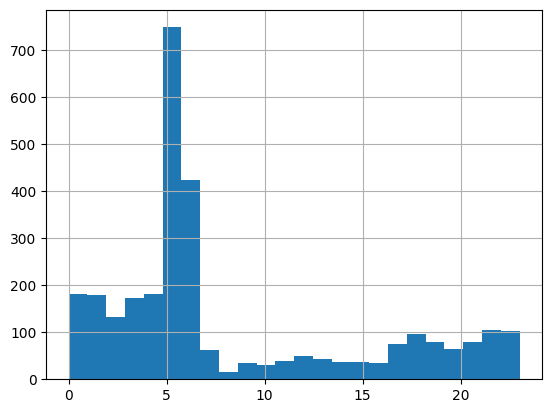

In [69]:
meta_train['hour'].hist(bins=24)

<AxesSubplot:>

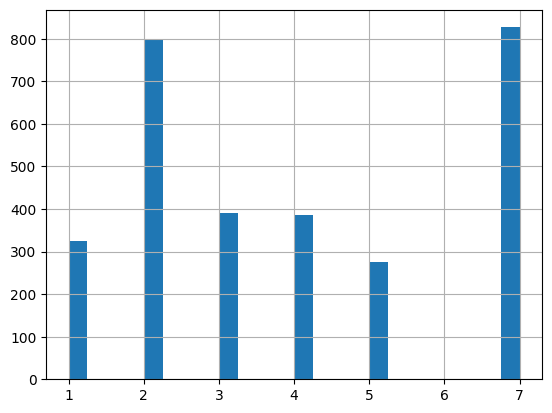

In [70]:
meta_train['dayofweek'].hist(bins=24)

<AxesSubplot:>

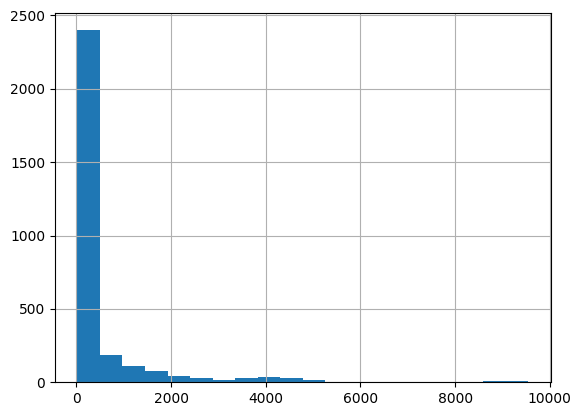

In [71]:
meta_train['views'].hist(bins=20)

<AxesSubplot:>

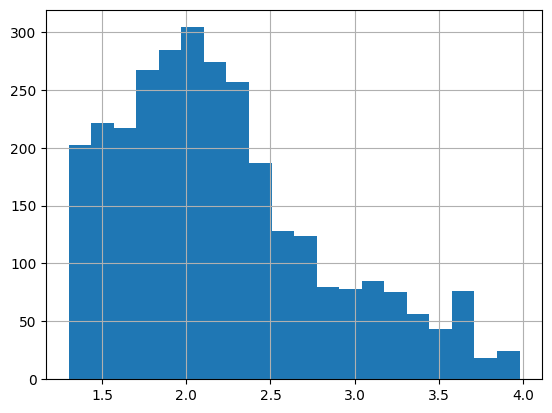

In [72]:
np.log10(meta_train['views']).hist(bins=20)

<AxesSubplot:>

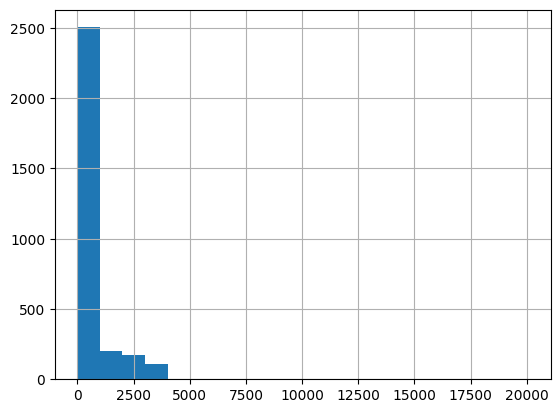

In [73]:
meta_train['duration'].hist(bins=20)

c:\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

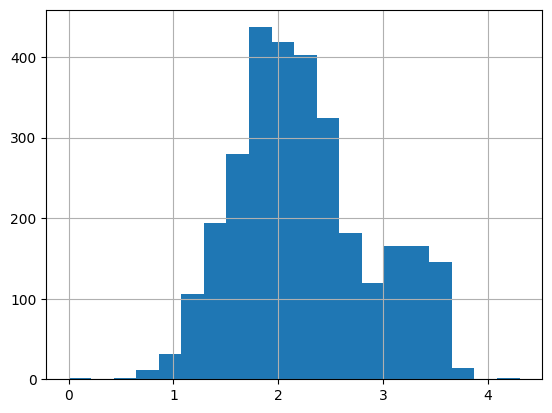

In [74]:
duration_log = np.log10(meta_train['duration']).replace(-np.inf, 0)
duration_log.hist(bins=20)

In [75]:
meta_train['ad_blocked'].value_counts()

False    2980
True       20
Name: ad_blocked, dtype: int64

In [76]:
meta_train['embed'].value_counts()

True     2982
False      18
Name: embed, dtype: int64

In [77]:
pd.crosstab(meta_train.partner, meta_train.partner_active)

partner_active,False,True
partner,,
False,1194,0
True,1123,683


In [78]:
cor_tbl_df = meta_train[['views', 'ratio', 'duration', 'language', 'n_likes', 'n_tags','n_formats', 'dayofweek', 'hour']]
sort_n = cor_tbl_df.corr().sort_values('views', ascending=False).index
cor_tbl_df.corr()[sort_n].iloc[0]
embed = pd.get_dummies(meta_train.embed, prefix ='embed',drop_first=True).astype(int)
partner = pd.get_dummies(meta_train.partner, prefix ='partner',drop_first=True).astype(int)
partner_active = pd.get_dummies(meta_train.partner_active, prefix ='partner_a',drop_first=True).astype(int)
language = pd.get_dummies(meta_train['language'], prefix='language',drop_first=True).astype(int)
weekday = pd.get_dummies(meta_train['dayofweek'], prefix='day',drop_first=True).astype(int)
weekday['day_6'] = 0

In [79]:
meta_final_df = pd.concat([meta_train[['comp_id', 'views', 'ratio', 'language', 'n_likes', 'duration']].reset_index(drop=True),
                           embed, partner, partner_active, language, weekday], axis=1)
meta_final_df.head()
meta_final_df.shape

(3000, 24)

In [80]:
meta_final_df.drop(['day_6'],axis=1,inplace=True)

In [81]:
X = meta_final_df.drop(['comp_id', 'views'], axis=1)
y = meta_final_df['views']

In [82]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Choose a model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 995684.6047130565


In [84]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer for regression, no activation function
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Epoch 1/100
60/60 - 3s - loss: 1932311.5000 - val_loss: 1656208.0000 - 3s/epoch - 49ms/step
Epoch 2/100
60/60 - 1s - loss: 1900530.0000 - val_loss: 1595012.8750 - 588ms/epoch - 10ms/step
Epoch 3/100
60/60 - 1s - loss: 1748911.7500 - val_loss: 1396709.7500 - 597ms/epoch - 10ms/step
Epoch 4/100
60/60 - 1s - loss: 1481398.8750 - val_loss: 1273788.1250 - 822ms/epoch - 14ms/step
Epoch 5/100
60/60 - 1s - loss: 1370094.6250 - val_loss: 1265497.3750 - 666ms/epoch - 11ms/step
Epoch 6/100
60/60 - 1s - loss: 1340777.6250 - val_loss: 1265394.3750 - 813ms/epoch - 14ms/step
Epoch 7/100
60/60 - 1s - loss: 1325216.1250 - val_loss: 1260284.7500 - 591ms/epoch - 10ms/step
Epoch 8/100
60/60 - 0s - loss: 1315026.6250 - val_loss: 1261942.3750 - 319ms/epoch - 5ms/step
Epoch 9/100
60/60 - 0s - loss: 1302963.2500 - val_loss: 1260150.1250 - 393ms/epoch - 7ms/step
Epoch 10/100
60/60 - 1s - loss: 1297344.2500 - val_loss: 1251719.8750 - 677ms/epoch - 11ms/step
Epoch 11/100
60/60 - 1s - loss: 1290210.3750 - val_los

In [85]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Function to create model
def create_model(optimizer='adam', activation='relu'):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_dim=X_train.shape[1]),
        layers.Dense(32, activation=activation),
        layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh']
}

# Create and fit the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")


C:\Users\yashb\AppData\Local\Temp\ipykernel_26848\3908874801.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)


Best Parameters: {'activation': 'relu', 'optimizer': 'adam'}


In [86]:
from tensorflow.keras.callbacks import LearningRateScheduler

def schedule(epoch, lr):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * np.exp(0.1 * (10 - epoch))

lr_scheduler = LearningRateScheduler(schedule)

# Add lr_scheduler to model.fit callbacks
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler], verbose=2)


Epoch 1/500
60/60 - 1s - loss: 1933822.6250 - val_loss: 1660062.7500 - lr: 0.0010 - 1s/epoch - 24ms/step
Epoch 2/500
60/60 - 0s - loss: 1923878.7500 - val_loss: 1645487.3750 - lr: 0.0010 - 273ms/epoch - 5ms/step
Epoch 3/500
60/60 - 0s - loss: 1893131.6250 - val_loss: 1605939.7500 - lr: 0.0010 - 268ms/epoch - 4ms/step
Epoch 4/500
60/60 - 0s - loss: 1821547.2500 - val_loss: 1524930.8750 - lr: 0.0010 - 256ms/epoch - 4ms/step
Epoch 5/500
60/60 - 0s - loss: 1701709.6250 - val_loss: 1420514.2500 - lr: 0.0010 - 256ms/epoch - 4ms/step
Epoch 6/500
60/60 - 0s - loss: 1568085.1250 - val_loss: 1332033.7500 - lr: 0.0010 - 265ms/epoch - 4ms/step
Epoch 7/500
60/60 - 0s - loss: 1466844.3750 - val_loss: 1287076.2500 - lr: 0.0010 - 308ms/epoch - 5ms/step
Epoch 8/500
60/60 - 0s - loss: 1406156.8750 - val_loss: 1271175.6250 - lr: 0.0010 - 418ms/epoch - 7ms/step
Epoch 9/500
60/60 - 0s - loss: 1372311.8750 - val_loss: 1266142.2500 - lr: 0.0010 - 487ms/epoch - 8ms/step
Epoch 10/500
60/60 - 0s - loss: 1352472

KeyboardInterrupt: 

In [87]:
# Create XGBoost model
import xgboost as xgb
model = xgb.XGBRegressor(
    objective ='reg:squarederror',
    colsample_bytree = 0.3,
    learning_rate = 0.1,
    max_depth = 5,
    alpha = 10,
    n_estimators = 100
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 884192.4925412178


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb


X = meta_final_df.drop(['views', 'comp_id'], axis=1) 
y = output['views']

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters to search
param_grid = {
    'colsample_bytree': [0.3, 0.5, 0.7],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [5, 10, 15],
    'n_estimators': [50, 100, 200]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Best Hyperparameters: {best_params}')


Mean Squared Error: 862563.0221934594
Best Hyperparameters: {'alpha': 5, 'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [99]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(meta_train.drop(['comp_id', 'views'], axis=1), meta_train['views'], test_size=0.2, random_state=42)

# Create an XGBoost regressor model
model = xgb.XGBRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

X_test = meta_test.drop(['views', 'comp_id'], axis=1) 
y_test = meta_test['views']
# Make predictions on the test data
# predictions = model.predict(X_test)

# Evaluate the model's performance


comp_ids = meta_test['comp_id']

# Drop irrelevant columns (similar to what you did in training)
X_test = meta_test.drop(['comp_id'], axis=1)

# Make predictions on the test data
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



KeyError: "['views'] not found in axis"